# Testing Elastostatic plane strain Greens Functions
___
Rishav Mallick 
___


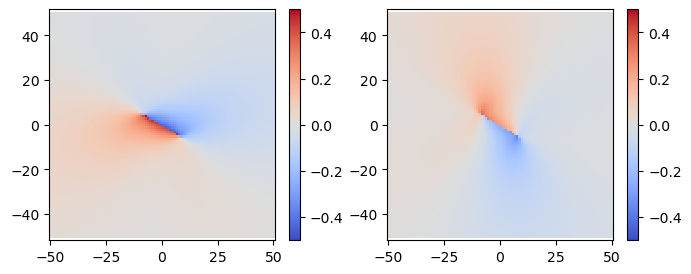

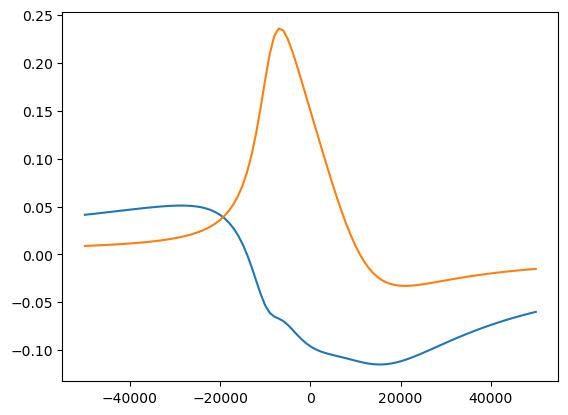

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import greensfunctions as GF

G = 30e3 # Shear Modulus in MPa
nu = 0.25 # Poisson ratio
E = 2*G*(1+nu) # young's modulus

nx2 = 101
nx3 = nx2

x2 = np.linspace(-50e3,50e3,nx2)
x3 = np.linspace(-50e3,50e3,nx3)
X2,X3 = np.meshgrid(x2,x3)

# specify source location
Y2 = 0
Y3 = 0
W = 20000
dip = 30
slip = 1
open = 0

# GF.compute_tractionkernel(X2,X3)

# Compute displacements in full space
Ux,Uy = GF.ufs_plane(X2,X3,Y2,Y3,W/2,dip,slip,open,nu)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

f1 = axs[0].pcolor(x2/1e3,x3/1e3,Ux,shading='auto',cmap='coolwarm')
fig.colorbar(f1,ax=axs[0])
f1.set_clim(-.5,.5)
axs[0].axis('equal')

f2 = axs[1].pcolor(x2/1e3,x3/1e3,Uy,shading='auto',cmap='coolwarm')
fig.colorbar(f2,ax=axs[1])
f2.set_clim(-.5,.5)
axs[1].axis('equal')

plt.show()

# Compute displacement profile along specified line
x2vec = x2
x3vec = x2*0 + 10e3
Ux,Uy = GF.ufs_plane(x2vec.reshape(-1,1),x3vec.reshape(-1,1),Y2,Y3,W/2,dip,slip,open,nu)
plt.plot(x2vec,Ux)
plt.plot(x2vec,Uy)
# plt.axis('tight')
plt.show()

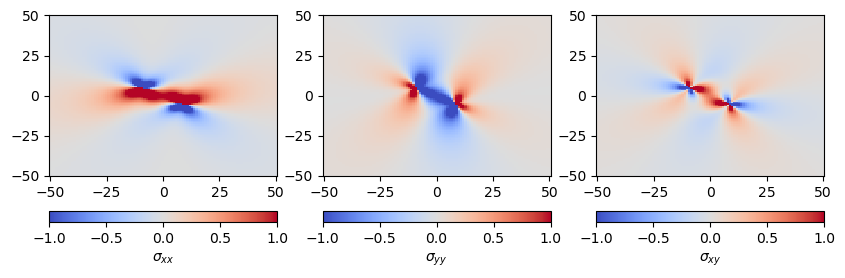

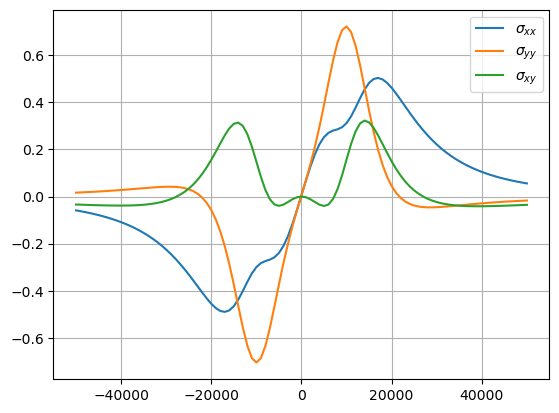

In [13]:
# Compute Stress
Sxx,Syy,Sxy = GF.stressfs_plane(X2,X3,Y2,Y3,W/2,dip,slip,open,nu,E)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

f1 = axs[0].pcolor(x2/1e3,x3/1e3,Sxx,shading='auto',cmap='coolwarm')
fig.colorbar(f1,ax=axs[0],label='$\sigma_{xx}$',orientation='horizontal')
f1.set_clim(-1,1)
axs[0].axis('tight')

f2 = axs[1].pcolor(x2/1e3,x3/1e3,Syy,shading='auto',cmap='coolwarm')
fig.colorbar(f2,ax=axs[1],label='$\sigma_{yy}$',orientation='horizontal')
f2.set_clim(-1,1)
axs[1].axis('tight')

f3 = axs[2].pcolor(x2/1e3,x3/1e3,Sxy,shading='auto',cmap='coolwarm')
fig.colorbar(f3,ax=axs[2],label='$\sigma_{xy}$',orientation='horizontal')
f3.set_clim(-1,1)
axs[2].axis('tight')
plt.show()


#  compute stress along a profile
Sxx,Syy,Sxy = GF.stressfs_plane(x2vec,x3vec,Y2,Y3,W/2,-np.deg2rad(dip),slip,open,nu,E)
plt.plot(x2vec,Sxx,label='$\sigma_{xx}$')
plt.plot(x2vec,Syy,label='$\sigma_{yy}$')
plt.plot(x2vec,Sxy,label='$\sigma_{xy}$')
plt.axis('tight')
plt.legend()
plt.grid()
plt.show()